In [23]:
import requests
import json
import time

# Client credentials
client_id = 'client_92b8c3462a03b7d8afdc35575cca6769'
client_secret = 'secret_0904e5094cc2d5018412957e84e83b44'
scopes = ['api_listings_read']

# Authentication URL
auth_url = 'https://auth.domain.com.au/v1/connect/token'

# List of agency IDs
agency_ids = ["232"]  # Replace with actual agency IDs

# Parameters for the GET request
params = {
    'listingStatusFilter': 'liveAndArchived',
    'pageSize': 200  # Fetching 200 listings per page
}

def get_access_token():
    response = requests.post(auth_url, data={
        'client_id': client_id,
        'client_secret': client_secret,
        'grant_type': 'client_credentials',
        'scope': ' '.join(scopes),
        'Content-Type': 'application/x-www-form-urlencoded'
    })
    
    json_response = response.json()
    return json_response['access_token']

def fetch_agency_data(agency_id, access_token):
    headers = {"Authorization": f"Bearer {access_token}"}
    all_listings = []
    
    # Iterate through pages 100 to 200
    for page_number in range(301, 400):
        params['pageNumber'] = page_number
        url_endpoint = f'https://api.domain.com.au/sandbox/v1/agencies/{agency_id}/listings'

        response = requests.get(url_endpoint, headers=headers, params=params)
        
        if response.status_code == 200:
            listings = response.json()
            if not listings:  # If no listings, stop fetching further pages
                print(f"No more listings found at page {page_number} for agency {agency_id}.")
                break
            all_listings.extend(listings)
            print(f"Fetched {len(listings)} listings from page {page_number} for agency {agency_id}.")
        else:
            print(f"Failed to retrieve data for agency {agency_id} on page {page_number}: {response.status_code}")
            break  # Stop if page doesn't exist or there's another error

        # Optional: Sleep between requests to avoid rate limiting
        time.sleep(1)
    
    return all_listings

def main():
    access_token = get_access_token()
    
    for agency_id in agency_ids:
        print(f"Fetching data for agency {agency_id}...")
        listings = fetch_agency_data(agency_id, access_token)
        
        # Store the data (e.g., save to a JSON file)
        with open(f'listings_agency_{agency_id}_232_4.json', 'w') as f:
            json.dump(listings, f, indent=2)
        
        print(f"Data for agency {agency_id} saved.\n")

if __name__ == "__main__":
    main()


Fetching data for agency 232...
Failed to retrieve data for agency 232 on page 301: 207
Data for agency 232 saved.



In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, avg, count, lit

# Initialize Spark session
spark = SparkSession.builder \
    .appName("RealEstateDataProcessing") \
    .getOrCreate()

# Load JSON data into Spark DataFrame
# Replace 'path/to/json/file' with the actual file path
df = spark.read.option("multiline", "true").json("listings_agency_232.json")

# Filter and count records for VIC vs other states
vic_count = df.filter(col("addressParts.stateAbbreviation") == "vic").count()
other_states_count = df.filter(col("addressParts.stateAbbreviation") != "vic").count()

# Filter and count records for rent vs sell
rent_count = df.filter(col("objective") == "rent").count()
sell_count = df.filter(col("objective") == "sell").count()

# Calculate average rent price for 1-bedroom and 2-bedroom properties
avg_rent_prices = df.filter(col("objective") == "rent") \
    .groupBy(col("bedrooms")) \
    .agg(avg(col("priceDetails.price")).alias("average_price")) \
    .filter(col("bedrooms").isin([1, 2])) \
    .collect()

# Extract average prices
average_rent_1_bed = next((row["average_price"] for row in avg_rent_prices if row["bedrooms"] == 1), None)
average_rent_2_bed = next((row["average_price"] for row in avg_rent_prices if row["bedrooms"] == 2), None)

# Print results
print(f"Number of listings in VIC: {vic_count}")
print(f"Number of listings in other states: {other_states_count}")
print(f"Number of rental listings: {rent_count}")
print(f"Number of sale listings: {sell_count}")
print(f"Average rent price for 1-bedroom: ${average_rent_1_bed:.2f}")
print(f"Average rent price for 2-bedroom: ${average_rent_2_bed:.2f}")

# Stop the Spark session
spark.stop()


Number of listings in VIC: 4200
Number of listings in other states: 0
Number of rental listings: 4200
Number of sale listings: 0
Average rent price for 1-bedroom: $327.22
Average rent price for 2-bedroom: $430.03


In [45]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, avg, count, lit

# Initialize Spark session
spark = SparkSession.builder \
    .appName("RealEstateDataProcessing") \
    .getOrCreate()

# Load JSON data into Spark DataFrame
# Replace 'path/to/json/file' with the actual file path
df = spark.read.option("multiline", "true").json("listings_agency_232_2.json")

# Filter and count records for VIC vs other states
vic_count = df.filter(col("addressParts.stateAbbreviation") == "vic").count()
other_states_count = df.filter(col("addressParts.stateAbbreviation") != "vic").count()

# Filter and count records for rent vs sell
rent_count = df.filter(col("objective") == "rent").count()
sell_count = df.filter(col("objective") == "sale").count()

# Calculate average rent price for 1-bedroom and 2-bedroom properties
avg_rent_prices = df.filter(col("objective") == "rent") \
    .groupBy(col("bedrooms")) \
    .agg(avg(col("priceDetails.price")).alias("average_price")) \
    .filter(col("bedrooms").isin([1, 2])) \
    .collect()

# Extract average prices
average_rent_1_bed = next((row["average_price"] for row in avg_rent_prices if row["bedrooms"] == 1), None)
average_rent_2_bed = next((row["average_price"] for row in avg_rent_prices if row["bedrooms"] == 2), None)

# Print results
print(f"Number of listings in VIC: {vic_count}")
print(f"Number of listings in other states: {other_states_count}")
print(f"Number of rental listings: {rent_count}")
print(f"Number of sale listings: {sell_count}")
print(f"Average rent price for 1-bedroom: ${average_rent_1_bed:.2f}")
print(f"Average rent price for 2-bedroom: ${average_rent_2_bed:.2f}")

# Stop the Spark session
spark.stop()


Number of listings in VIC: 20000
Number of listings in other states: 0
Number of rental listings: 13040
Number of sale listings: 6960
Average rent price for 1-bedroom: $467.49
Average rent price for 2-bedroom: $621.03


In [15]:
import pandas as pd
import json

# Load JSON data into a Pandas DataFrame
def load_json_to_df(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return pd.json_normalize(data)

# Function to recursively convert unhashable types (dict, list) to hashable types (tuple)
def make_hashable(item):
    if isinstance(item, dict):
        return tuple((key, make_hashable(value)) for key, value in sorted(item.items()))
    elif isinstance(item, list):
        return tuple(make_hashable(i) for i in item)
    else:
        return item

# Load the JSON file into a DataFrame
pdf = load_json_to_df('rental_listings.json')

# Apply the recursive conversion to all elements in the DataFrame
for col in pdf.columns:
    pdf[col] = pdf[col].apply(make_hashable)

# Now you can drop duplicates
pdf_cleaned = pdf.drop_duplicates()

# Display the cleaned DataFrame
print(pdf_cleaned.count())


objective                                52840
propertyTypes                            52840
status                                   52840
saleMode                                 52840
channel                                  52840
bathrooms                                52840
bedrooms                                 52840
carspaces                                52840
dateAvailable                            16837
dateUpdated                              52840
dateListed                               52840
description                              52840
features                                 26268
headline                                 52840
id                                       52840
isNewDevelopment                         52840
media                                    51271
propertyId                               25645
seoUrl                                   52840
addressParts.stateAbbreviation           52840
addressParts.displayType                 52840
addressParts.

In [24]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, avg, max, count, lit, to_date

# Initialize Spark session
spark = SparkSession.builder \
    .appName("RealEstateDataProcessing") \
    .getOrCreate()

# Load JSON data into Spark DataFrame
# Replace 'path/to/json/file' with the actual file path
df = spark.read.option("multiline", "true").json("listings_agency_232_2.json")

# Convert 'dateListed' to date type
df = df.withColumn("dateListed", to_date(col("dateListed"), "yyyy-MM-dd"))

# Define date range for filtering
start_date = "2020-01-01"
end_date = "2023-12-31"

# Filter data based on date range
filtered_df = df

# Filter and count records for VIC vs other states
vic_count = filtered_df.filter(col("addressParts.stateAbbreviation") == "vic").count()
other_states_count = filtered_df.filter(col("addressParts.stateAbbreviation") != "vic").count()

# Filter and count records for rent vs sell
rent_count = filtered_df.filter(col("objective") == "rent").count()
sell_count = filtered_df.filter(col("objective") == "sell").count()

# Calculate average and max rent price for 1-bedroom and 2-bedroom properties
avg_rent_prices = filtered_df.filter(col("objective") == "rent") \
    .groupBy(col("bedrooms")) \
    .agg(
        avg(col("priceDetails.price")).alias("average_price"),
        max(col("priceDetails.price")).alias("max_price")
    ) \
    .filter(col("bedrooms").isin([1, 2])) \
    .collect()

# Extract average and max prices
average_rent_1_bed = next((row["average_price"] for row in avg_rent_prices if row["bedrooms"] == 1), None)
max_rent_1_bed = next((row["max_price"] for row in avg_rent_prices if row["bedrooms"] == 1), None)
average_rent_2_bed = next((row["average_price"] for row in avg_rent_prices if row["bedrooms"] == 2), None)
max_rent_2_bed = next((row["max_price"] for row in avg_rent_prices if row["bedrooms"] == 2), None)

# Print results
print(f"Number of listings in VIC: {vic_count}")
print(f"Number of listings in other states: {other_states_count}")
print(f"Number of rental listings: {rent_count}")
print(f"Number of sale listings: {sell_count}")
print(f"Average rent price for 1-bedroom: ${average_rent_1_bed:.2f}")
print(f"Max rent price for 1-bedroom: ${max_rent_1_bed:.2f}")
print(f"Average rent price for 2-bedroom: ${average_rent_2_bed:.2f}")
print(f"Max rent price for 2-bedroom: ${max_rent_2_bed:.2f}")

# Stop the Spark session
spark.stop()


Number of listings in VIC: 20000
Number of listings in other states: 0
Number of rental listings: 13040
Number of sale listings: 0
Average rent price for 1-bedroom: $467.49
Max rent price for 1-bedroom: $900.00
Average rent price for 2-bedroom: $621.03
Max rent price for 2-bedroom: $1250.00


In [37]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, when, avg
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Spark session
spark = SparkSession.builder \
    .appName("RealEstateDataProcessing") \
    .getOrCreate()

# Set legacy time parser policy
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

# Load JSON data into Spark DataFrame
df = spark.read.option("multiline", "true").json("listings_agency_232_2.json")

# Convert 'dateListed' to date type
df = df.withColumn("dateListed", to_date(col("dateListed"), "yyyy-MM-dd"))

# Define date range for filtering
start_date = "2020-01-01"
end_date = "2023-12-31"

# Filter data based on date range
filtered_df = df.filter((col("dateListed") >= lit(start_date)) & (col("dateListed") <= lit(end_date)))

# Filter and select necessary columns
filtered_df = filtered_df.filter(col("objective") == "rent") \
    .select("dateListed", "bedrooms", "priceDetails.price")

# Convert Spark DataFrame to Pandas DataFrame
pdf = filtered_df.toPandas()

# Convert 'dateListed' to datetime
pdf['dateListed'] = pd.to_datetime(pdf['dateListed'], errors='coerce')

# Set date as index
pdf.set_index('dateListed', inplace=True)

/tmp/ipykernel_1418/2100366392.py:28: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  pdf['year_month'] = pdf['dateListed'].dt.to_period('M')


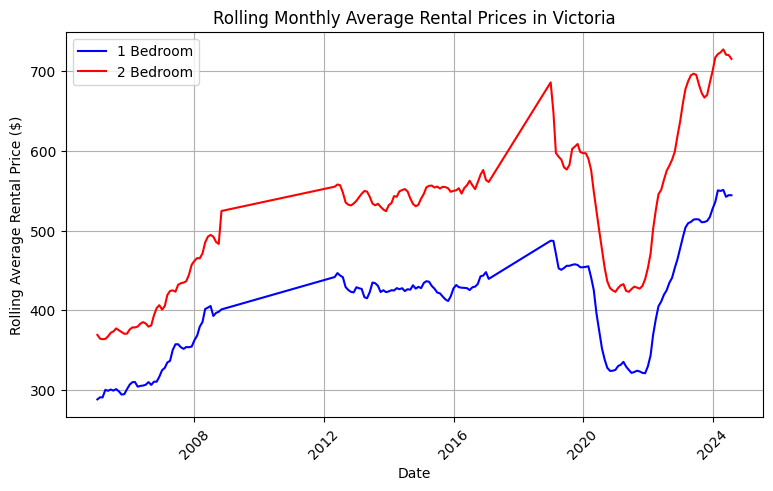

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load JSON data into Pandas DataFrame
def load_json_to_df(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return pd.json_normalize(data)

# Load data from JSON files
df1 = load_json_to_df('listings_agency_232.json')
df2 = load_json_to_df('listings_agency_232_2.json')

# Combine DataFrames if needed
pdf = pd.concat([df1, df2], ignore_index=True)

pdf = load_json_to_df('rental_listings.json')

# Convert 'dateListed' to datetime
pdf['dateListed'] = pd.to_datetime(pdf['dateListed'], errors='coerce')

# Drop rows with invalid dates
pdf = pdf.dropna(subset=['dateListed'])

# Extract year and month for grouping
pdf['year_month'] = pdf['dateListed'].dt.to_period('M')

# Filter for rental listings only
pdf_rent = pdf[pdf['objective'] == 'rent']

# Calculate the average rental price per month for each bedroom type
monthly_avg = pdf_rent.groupby(['year_month', 'bedrooms'])['priceDetails.price'].mean().reset_index()

# Convert 'year_month' back to datetime for plotting
monthly_avg['year_month'] = monthly_avg['year_month'].dt.to_timestamp()

# Calculate rolling average with a window of 3 months
monthly_avg['rolling_avg_price'] = monthly_avg.groupby('bedrooms')['priceDetails.price'].rolling(window=3).mean().reset_index(level=0, drop=True)

# Plotting
plt.figure(figsize=(9, 5))

# Plot for 1-bedroom properties
bedroom_1 = monthly_avg[monthly_avg['bedrooms'] == 1]
sns.lineplot(data=bedroom_1, x='year_month', y='rolling_avg_price', label='1 Bedroom', color='blue')

# Plot for 2-bedroom properties
bedroom_2 = monthly_avg[monthly_avg['bedrooms'] == 2]
sns.lineplot(data=bedroom_2, x='year_month', y='rolling_avg_price', label='2 Bedroom', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Rolling Average Rental Price ($)')
plt.title('Rolling Monthly Average Rental Prices in Victoria')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-ticks for better readability

# Save the plot to a PNG file
plot_path = 'rolling_avg_rental_prices.png'
plt.savefig(plot_path, bbox_inches='tight')
plt.show()


/tmp/ipykernel_13646/922917836.py:26: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  pdf['year_month'] = pdf['dateListed'].dt.to_period('M')


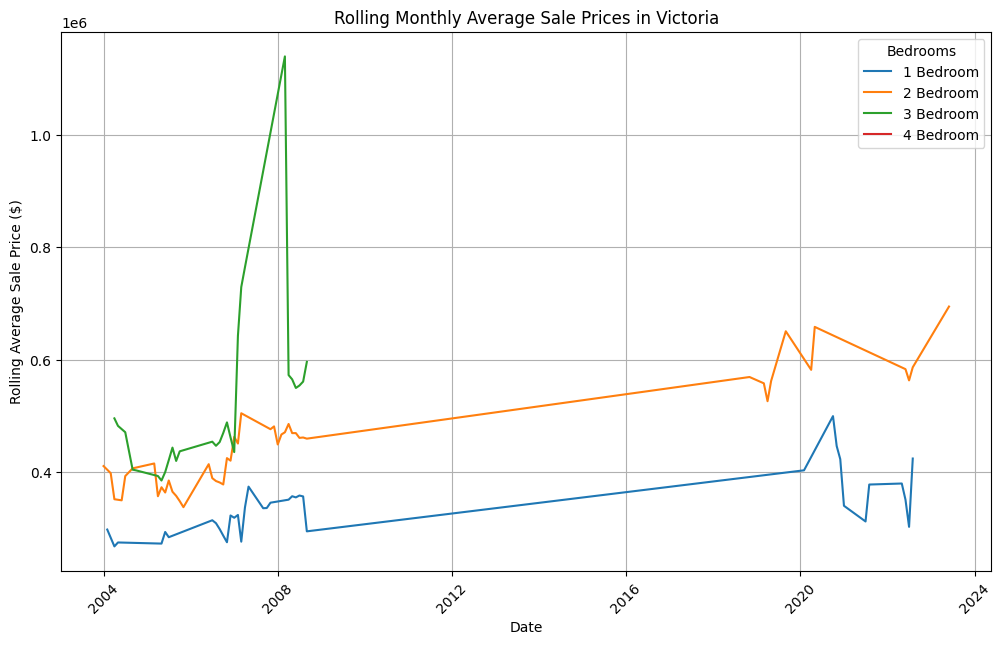

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load JSON data into Pandas DataFrame
def load_json_to_df(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return pd.json_normalize(data)

# Load data from JSON files
df1 = load_json_to_df('listings_agency_232.json')
df2 = load_json_to_df('listings_agency_232_2.json')

# Combine DataFrames if needed
pdf = pd.concat([df1, df2], ignore_index=True)

# Convert 'dateListed' to datetime
pdf['dateListed'] = pd.to_datetime(pdf['dateListed'], errors='coerce')

# Drop rows with invalid dates
pdf = pdf.dropna(subset=['dateListed'])

# Extract year and month for grouping
pdf['year_month'] = pdf['dateListed'].dt.to_period('M')

# Filter for sale listings only
pdf_sale = pdf[pdf['objective'] == 'sale']

# Calculate the average sale price per month for each bedroom type
monthly_avg_sale = pdf_sale.groupby(['year_month', 'bedrooms'])['priceDetails.price'].mean().reset_index()

# Convert 'year_month' back to datetime for plotting
monthly_avg_sale['year_month'] = monthly_avg_sale['year_month'].dt.to_timestamp()

# Calculate rolling average with a window of 3 months
monthly_avg_sale['rolling_avg_price'] = monthly_avg_sale.groupby('bedrooms')['priceDetails.price'].rolling(window=3).mean().reset_index(level=0, drop=True)

# Plotting
plt.figure(figsize=(12, 7))

# Plot for 1 to 4 bedroom properties
for num_bedrooms in range(1, 5):
    bedroom_data = monthly_avg_sale[monthly_avg_sale['bedrooms'] == num_bedrooms]
    sns.lineplot(data=bedroom_data, x='year_month', y='rolling_avg_price', label=f'{num_bedrooms} Bedroom')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Rolling Average Sale Price ($)')
plt.title('Rolling Monthly Average Sale Prices in Victoria')
plt.legend(title='Bedrooms')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-ticks for better readability

# Save the plot to a PNG file
plot_path = 'rolling_avg_sale_prices.png'
plt.savefig(plot_path, bbox_inches='tight')
plt.show()


In [43]:
# Check the range of dates in the DataFrame
print("Date range in the DataFrame:")
print(pdf['dateListed'].min(), pdf['dateListed'].max())


Date range in the DataFrame:
2003-11-03 16:38:00+00:00 2024-08-24 05:45:24+00:00


In [17]:
# Check the range of dates after filtering
print("Date range after filtering for rental listings:")
print(pdf_rent['dateListed'].min(), pdf_rent['dateListed'].max())


Date range after filtering for rental listings:
2004-11-12 09:31:50+00:00 2024-08-24 05:45:24+00:00


In [42]:
import pandas as pd
import json

# Load JSON data into Pandas DataFrame
def load_json_to_df(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return pd.json_normalize(data)

# Load data from JSON file
df = load_json_to_df('listings_agency_232_2.json')

# Convert 'dateListed' to datetime
df['dateListed'] = pd.to_datetime(df['dateListed'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['dateListed'])

# Extract year from 'dateListed'
df['year'] = df['dateListed'].dt.year

# Count number of listings per year
listings_per_year = df.groupby('year').size().reset_index(name='number_of_listings')

# Print results
print(listings_per_year)


    year  number_of_listings
0   2003                   8
1   2004                  26
2   2005                 357
3   2006                 332
4   2007                 417
5   2008                 334
6   2009                 384
7   2010                 394
8   2011                 318
9   2012                 445
10  2013                 260
11  2014                 325
12  2015                 375
13  2016                 402
14  2017                 341
15  2018                 364
16  2019                 277
17  2020                 327
18  2021                1066
19  2022                5316
20  2023                4879
21  2024                3053


In [48]:
import json

# Load JSON data from a file
def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

# Save JSON data to a file
def save_json(data, output_path):
    with open(output_path, 'w') as file:
        json.dump(data, file, indent=4)

# Paths to your JSON files
file1 = 'listings_agency_232.json'
file2 = 'listings_agency_232_2.json'
file3 = 'listings_agency_232_3.json'  # Assuming there's a third file

# Load the JSON data
data1 = load_json(file1)
data2 = load_json(file2)
data3 = load_json(file3)

# Combine the data into one list
combined_data = data1 + data2 + data3

# Filter out only rental listings
rental_listings = [listing for listing in combined_data if listing.get('objective') == 'rent']

# Save the filtered rental listings to a new JSON file
output_file = 'rental_listings.json'
save_json(rental_listings, output_file)

print(f"Filtered rental listings have been saved to {output_file}")


Filtered rental listings have been saved to rental_listings.json
